# Multivariable regression
#### Emile Badran U2 L4 P4

Using the [FBI:UCR Crime dataset](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls), build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.options.display.max_rows = 100000
#pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import Binarizer
from sklearn import linear_model

### Loading the data, fixing column names, and filling NANs:

In [2]:
data = pd.read_excel('fbi_ny_2013.xls', sheet_name=0, header=1, skiprows=3, skip_footer=3,
                     index_col=0, thousands=None)

data.columns = ['population', 'violent_crime',
       'murder',
       'rape', 'rape_legacy',
       'robbery', 'assault', 'property_crime', 'burglary',
       'larceny_theft', 'vehicle_theft', 'arson']
data.index.names = ['city']
data = data.fillna(0)
data = data.astype('int64')

In [3]:
df = data[['population','assault','robbery','property_crime']]

## Grouping cities according to population size

In [4]:
ny = df[df.index == 'New York']
ny.name = 'ny'

greater_100 = df[(df.population >= 100000) & (df.population < 1000000)]
greater_100.name = 'greater_100'

less_100 = df[(df.population < 100000)]
less_100.name = 'less_100'

dataframes = [ny, greater_100, less_100]

# Running the regression

ny


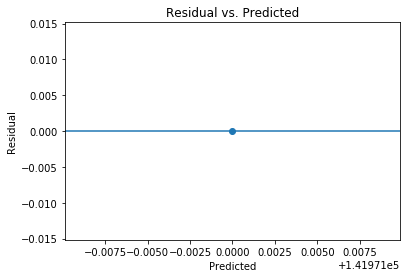

greater_100


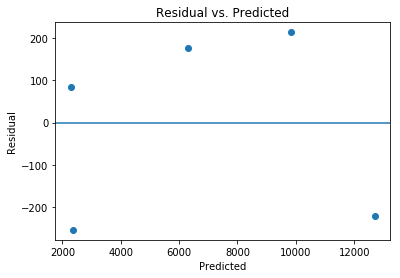

less_100


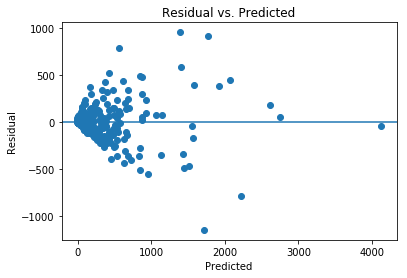

In [5]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()

for dataframe in dataframes:
    Y = dataframe['property_crime'].values.reshape(-1, 1)
    X = dataframe.iloc[:,:3]
    regr.fit(X, Y)

    print(dataframe.name)
    
    predicted = regr.predict(X).ravel()
    actual = dataframe['property_crime']

    residual = actual - predicted

    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    plt.show()

    dataframe['predicted'] = predicted
    dataframe['residual'] = residual